In [1]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


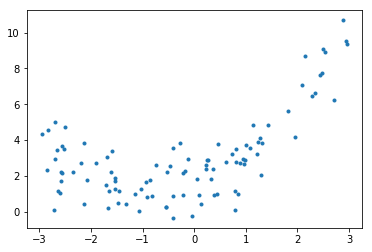

In [3]:
import matplotlib.pyplot as plt
plt.plot(X, y, '.')
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.1751428]), array([[ 0.90166467,  0.5111329 ]]))

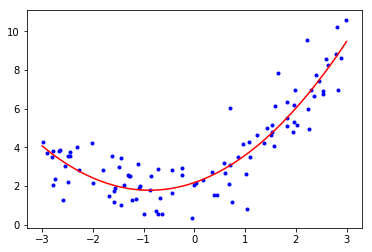

In [23]:
plt.plot(X, y, 'b.')
X_train = np.arange(-3, 3.1, 0.1)
y_pred = 2.1751428 + 0.90166467 * X_train + 0.5111329 * X_train ** 2
plt.plot(X_train, y_pred, 'r-')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()

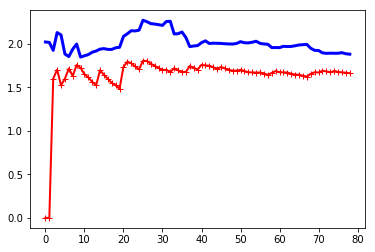

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


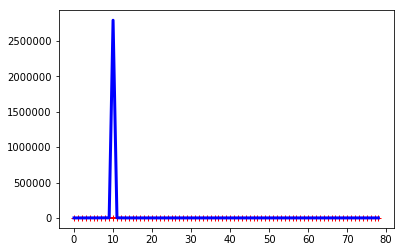

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)

# Iris

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  

['data', 'target', 'target_names', 'DESCR', 'feature_names']


In [38]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 0.98552764  0.01447236]
 [ 0.98549026  0.01450974]
 [ 0.98545279  0.01454721]
 ..., 
 [ 0.02600683  0.97399317]
 [ 0.02594062  0.97405938]
 [ 0.02587457  0.97412543]]


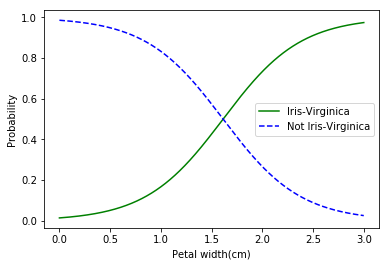

In [58]:
# 兩種切法
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
print(type(X_new[0]))
#print(X_new)
X_new = np.arange(0, 3, 0.001).reshape(-1, 1)
print(type(X_new[0]))
y_proba = log_reg.predict_proba(X_new)
print(y_proba)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.ylabel("Probability")
plt.xlabel("Petal width(cm)")
plt.legend()
plt.show()

In [59]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [5]:
from sklearn.linear_model import LogisticRegression
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
softmax_reg.predict([[5, 2]])

array([2])

In [7]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

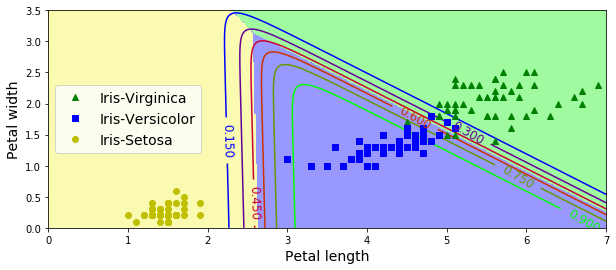

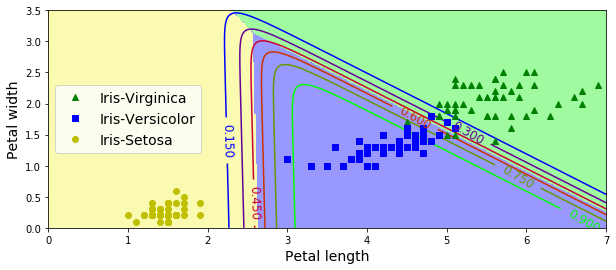

In [11]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

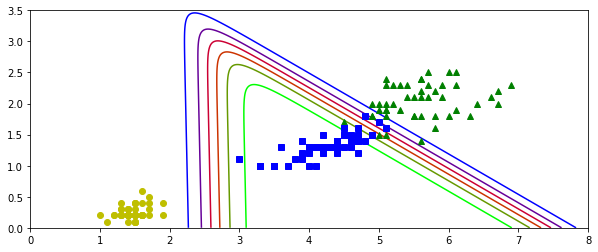

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
#plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
#plt.xlabel("Petal length", fontsize=14)
#plt.ylabel("Petal width", fontsize=14)
#plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
plt.show()

In [21]:
x0, x1, zz1

(array([[ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ],
        [ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ],
        [ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ],
        ..., 
        [ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ],
        [ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ],
        [ 0.        ,  0.01603206,  0.03206413, ...,  7.96793587,
          7.98396794,  8.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.01758794,  0.01758794,  0.01758794, ...,  0.01758794,
          0.01758794,  0.01758794],
        [ 0.03517588,  0.03517588,  0.03517588, ...,  0.03517588,
          0.03517588,  0.03517588],
        ..., 
        [ 3.46482412,  3.46482412,  3.46482412, ...,